# Predicting Heart Disease using Machine Learning

**This model helps to predict whether a person has heart disease using their medical features.**

![](6-step-ml-framework.png)

**Steps :**
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Defination

In a statement,
> Given the medical features such as BloodPressure,HeartBeatRate,etc., we are going to predict whether the person having the heart_disease or not

## 2.Data

The data come from the UCI Machine Learning Repository.
* Link-https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci
* Link-https://archive.ics.uci.edu/dataset/45/heart+disease

## 3.Evaluation

> If model can reach 95% accuracy in predicting the heart_disease whether or not patient has heart disease during the proof of concept, we will pursue the project.

## 4.Features

* From the data we have these are import features to consider in prediction
* This can be known by having prior knowledge on subject or from subject matter expert.

1. Age
2. Sex :
    * male : 1
    * female : 0

4. chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

5. resting blood pressure (in mm Hg on admission to the hospital)

6. serum cholestoral in mg/dl(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. resting electrocardiographic results

    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved exercise induced angina (1 = yes; 0 = no)

9. Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping

12. vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

13. A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. Target :
    * 0 No Heart disease
    * 1 Heart disease

## Preparing Tools

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## import the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##import Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

## Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

1. Type of data.
2. Missing data and methood to deal it.
3. Finding Outliers.
4. Add,Remove,Change the features of data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

This shows this is a balenced classification problem.

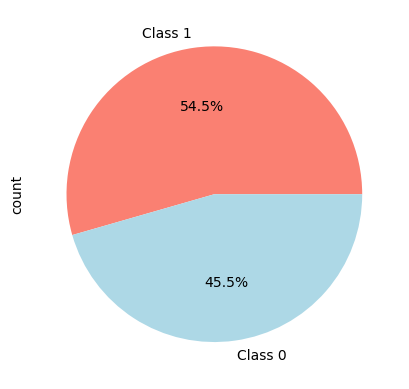

In [7]:
df.target.value_counts().plot(kind="pie",colors=["salmon","lightblue"],labels=['Class 1', 'Class 0'], autopct='%1.1f%%');

In [8]:
## Finding missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values in data to deal with.

In [9]:
#data description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


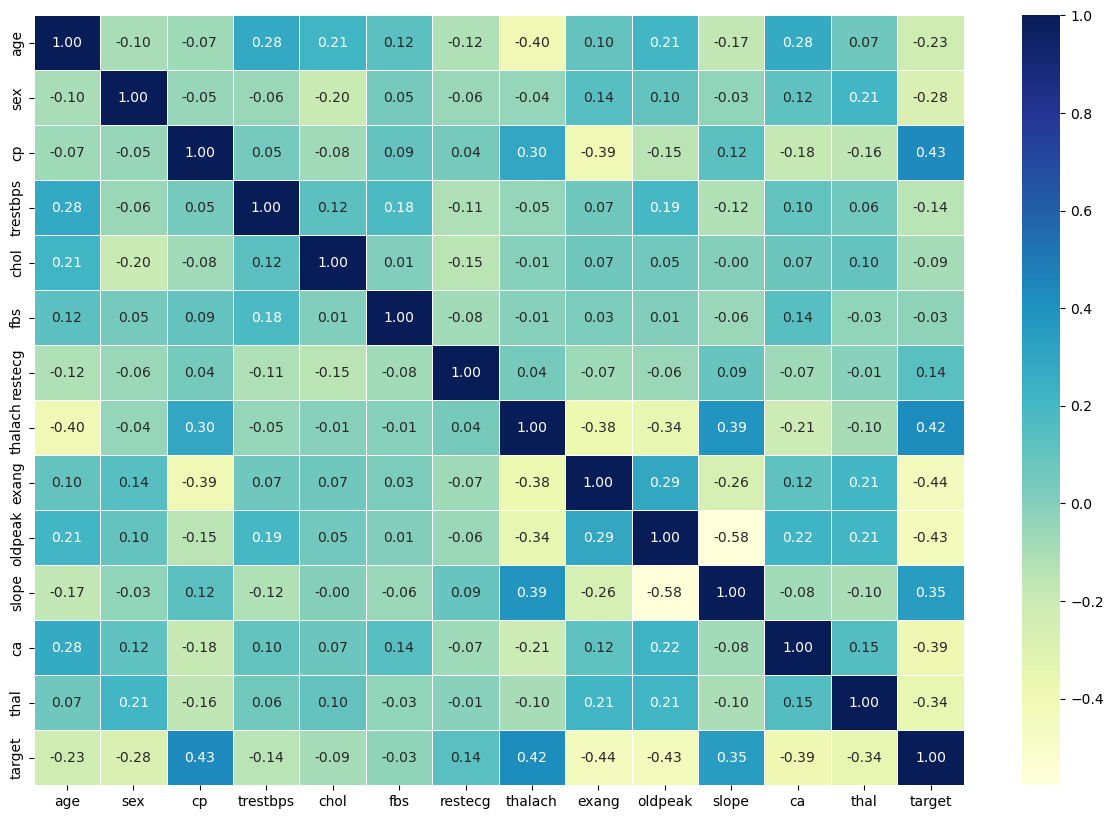

In [10]:
##relation between the features
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

**From this Age and Thalach are highly correlated**
> Also while comparing with target we came to know that the ("chol","fbs"),("trestbps","restecg") are some of the features which has less effect on target variable.

### Comparing target with Sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Here "1" indicate  Male and "0" indicate Female

In [12]:
data=pd.crosstab(df.sex,df.target)

In [13]:
data.index=["Female","Male"]

In [14]:
data

target,0,1
Female,24,72
Male,114,93


In [15]:
data["per"]=(((data[1])/(data[0]+data[1]))*100).round(2)
data

target,0,1,per
Female,24,72,75.00
Male,114,93,44.93


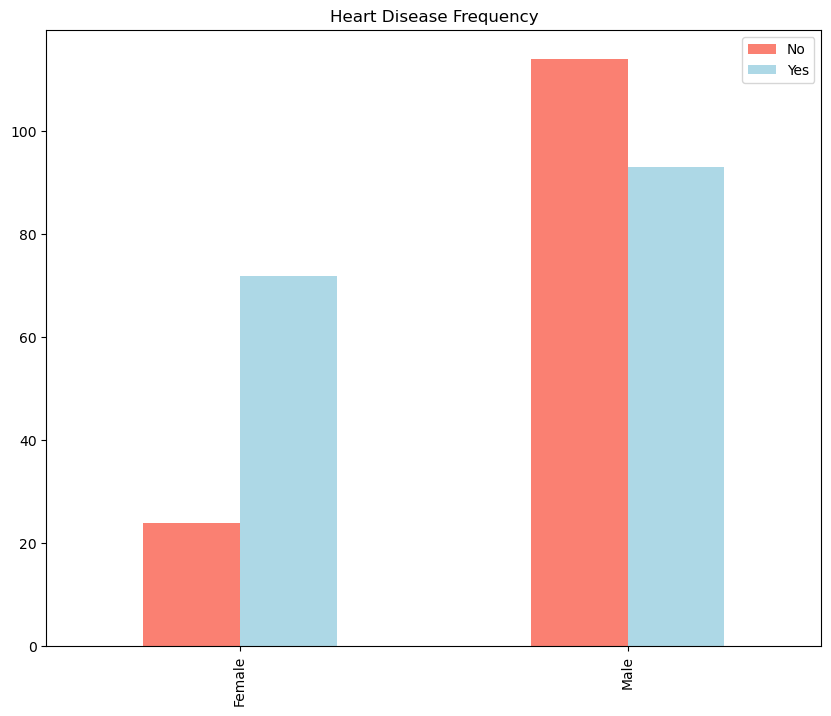

In [16]:
data.drop("per",axis=1).plot(kind="bar",
          figsize=(10,8),
          color=["salmon","lightblue"],
         )
plt.legend(["No","Yes"])
plt.title("Heart Disease Frequency");

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


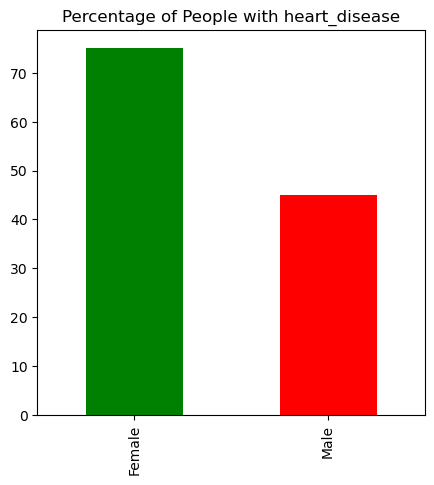

In [18]:
data.per.plot(kind="bar",color=["Green","Red"],figsize=(5,5));
plt.title("Percentage of People with heart_disease");

### Age vs Max Heart Rate(thalach) for heart disease

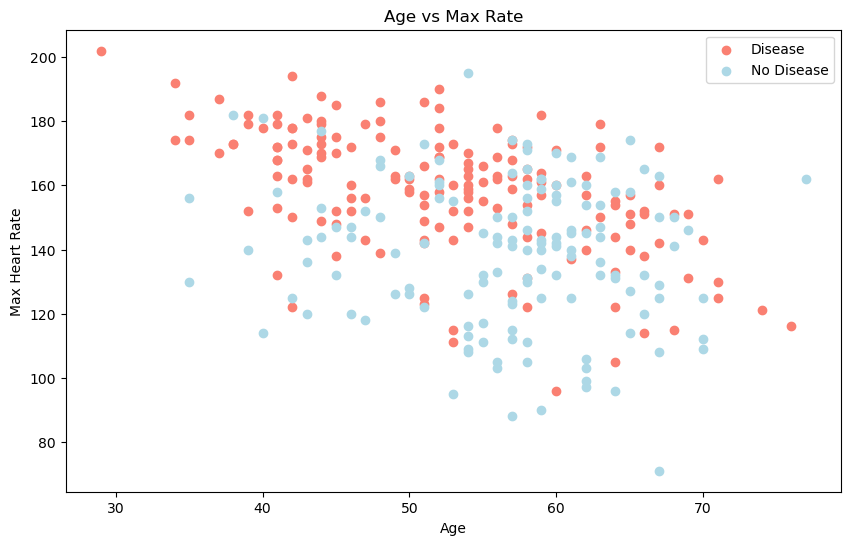

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Age vs Max Rate")
plt.legend(["Disease","No Disease"]);

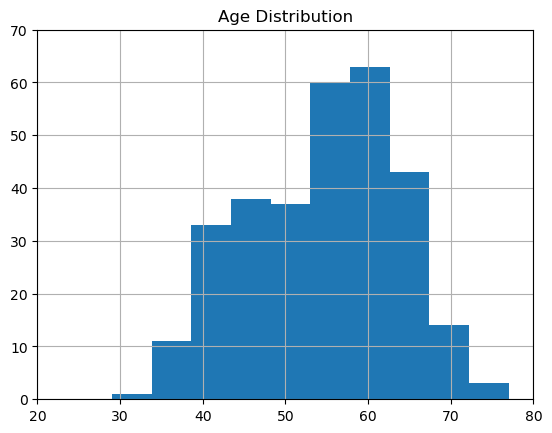

In [20]:
df.age.hist()
plt.title("Age Distribution")
plt.xlim(20,80)
plt.ylim(0,70);

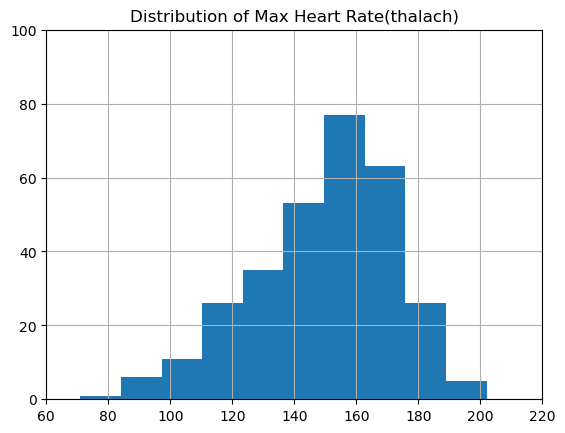

In [21]:
df.thalach.hist()
plt.title("Distribution of Max Heart Rate(thalach)")
plt.ylim(0,100)
plt.xlim(60,220);

### Comparing target with chest Pain

chest pain type:
*  Value 1: typical angina
*  Value 2: atypical angina
*  Value 3: non-anginal pain
*  Value 4: asymptomatic

In [22]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


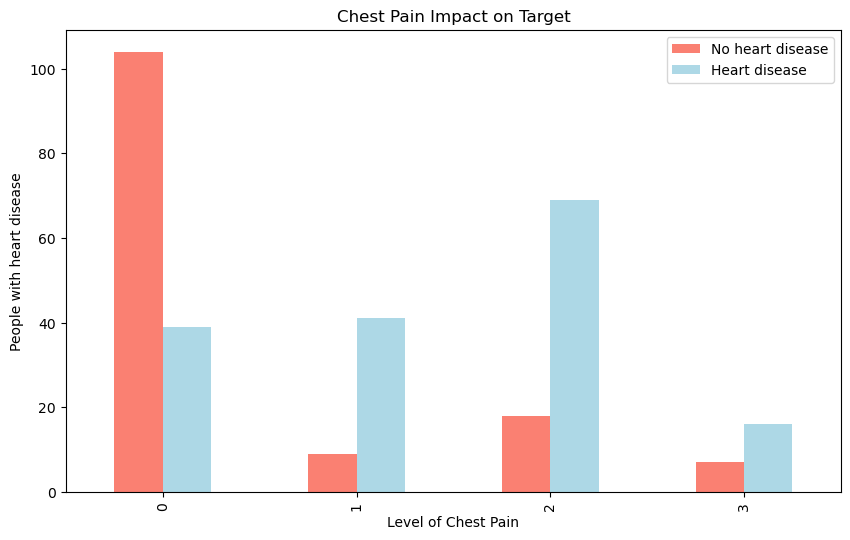

In [23]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["salmon","lightblue"])
plt.title("Chest Pain Impact on Target")
plt.xlabel("Level of Chest Pain")
plt.ylabel("People with heart disease")
plt.legend(["No heart disease","Heart disease"]);

## 5.Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
## Divide the dependent and independent variables
X,Y=df.drop("target",axis=1),df.target

##Split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

![](sklearn-ml-map.png)

From this sklearn map we can say that with the data we have we first go with the "LinearSVC" then if it is not working use KNN classifier if also not works  use SVC,Ensemble classifiers.

In [27]:
def fit_score(model,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model.fit(x_train,y_train)
    train_score=round(model.score(x_train,y_train),2)
    test_score=round(model.score(x_test,y_test),2)
    print("Scoring the train data:",train_score)
    print("Scoring the test data:",test_score)
    return (train_score,test_score)

### Linear SVC

In [28]:
SVC??

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Source:        
class SVC(BaseSVC):
    """C-Support Vector Classification.

    The implementation is based on libsvm. The fit time scales at least
    quadratically with the number of samples and may be impractical
    beyond tens of thousands of samples. For large datasets
    consider using :class:`~sklearn.svm.LinearSVC` or
    :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
    :class:`~sklearn.kernel_approximation.Nystroem` transformer or
    other :ref:`kernel_approximation`.

    The multiclass support is handled according to a one-vs-one scheme.

    For details on the precise mathematical formulation of the provided
    kernel functio

In [29]:
model=SVC(kernel="linear")
SVC_score=fit_score(model,x_train,x_test,y_train,y_test)

Scoring the train data: 0.86
Scoring the test data: 0.87


### Logistic Regression

In [30]:
LogisticRegression??

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Source:        
class LogisticRegression(LinearClassifierMixin, SparseCoefMixin, BaseEstimator):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    th

In [31]:
model=LogisticRegression()
LR_score=fit_score(model,x_train,x_test,y_train,y_test)

Scoring the train data: 0.86
Scoring the test data: 0.89


C:\Users\91799\Documents\HARSHA\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN Classifier

In [32]:
KNeighborsClassifier??

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Source:        
class KNeighborsClassifier(KNeighborsMixin, ClassifierMixin, NeighborsBase):
    """Classifier implementing the k-nearest neighbors vote.

    Read more in the :ref:`User Guide <classification>`.

    Parameters
    ----------
    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : {'uniform', 'distance'}, callable or None, default='uniform'
        Weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are furthe

In [33]:
model=KNeighborsClassifier()
KNN_score=fit_score(model,x_train,x_test,y_train,y_test)

Scoring the train data: 0.76
Scoring the test data: 0.69


### RandomForestClassifier

In [34]:
RandomForestClassifier??

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Source:        
class RandomForestClassifier(ForestClassifier):
    """
    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    Trees in the forest use the best split strategy, i.e. equivalent to passing
    `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
    The sub-sample size is contr

In [35]:
model=RandomForestClassifier()
RFC_score=fit_score(model,x_train,x_test,y_train,y_test)

Scoring the train data: 1.0
Scoring the test data: 0.84


### Comparing all the models

In [36]:
data=pd.DataFrame([SVC_score,LR_score,KNN_score,RFC_score],columns=["Train_score","Test_score"],index=["SVC","Logistic Regression","KNN Classifier","Random Forest Classifier"])
data

,Train_score,Test_score
SVC,0.86,0.87
Logistic Regression,0.86,0.89
KNN Classifier,0.76,0.69
Random Forest Classifier,1.00,0.84


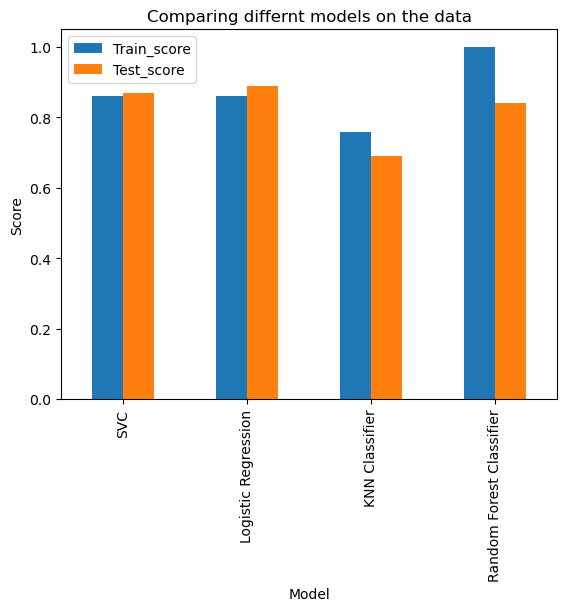

In [37]:
data.plot(kind="bar")
plt.title("Comparing differnt models on the data")
plt.ylabel("Score")
plt.xlabel("Model");

### Now check the models by following:
* HyperParameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under ROC(AUC)

#### Hyper Parameter Tuning

From the description of we models there is no way for changing hyper paramters in Logistic Regression and Linear SVC 

##### By Hand

**KNN Classifier**

In [38]:
d={}
d["train_score"]=[0]
d["test_score"]=[0]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    print(f"For {i} neighbours:")
    train_score,test_score=fit_score(knn,x_train,x_test,y_train,y_test)
    d["train_score"].append(train_score)
    d["test_score"].append(test_score)

For 1 neighbours:
Scoring the train data: 1.0
Scoring the test data: 0.62
For 2 neighbours:
Scoring the train data: 0.81
Scoring the test data: 0.64
For 3 neighbours:
Scoring the train data: 0.77
Scoring the test data: 0.66
For 4 neighbours:
Scoring the train data: 0.74
Scoring the test data: 0.67
For 5 neighbours:
Scoring the train data: 0.76
Scoring the test data: 0.69
For 6 neighbours:
Scoring the train data: 0.75
Scoring the test data: 0.72
For 7 neighbours:
Scoring the train data: 0.74
Scoring the test data: 0.7
For 8 neighbours:
Scoring the train data: 0.72
Scoring the test data: 0.69
For 9 neighbours:
Scoring the train data: 0.72
Scoring the test data: 0.69
For 10 neighbours:
Scoring the train data: 0.69
Scoring the test data: 0.7
For 11 neighbours:
Scoring the train data: 0.73
Scoring the test data: 0.75
For 12 neighbours:
Scoring the train data: 0.7
Scoring the test data: 0.74
For 13 neighbours:
Scoring the train data: 0.69
Scoring the test data: 0.74
For 14 neighbours:
Scorin

In [39]:
data=pd.DataFrame(d)
data

,train_score,test_score
0,0.00,0.00
1,1.00,0.62
2,0.81,0.64
3,0.77,0.66
4,0.74,0.67
5,0.76,0.69
6,0.75,0.72
7,0.74,0.70
8,0.72,0.69
9,0.72,0.69


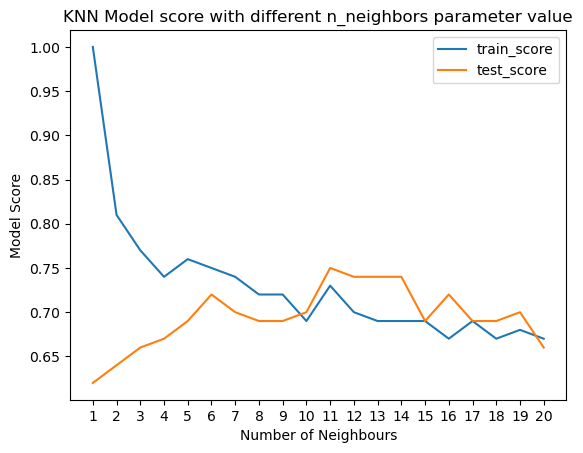

In [40]:
data[1:].plot()
plt.xlabel("Number of Neighbours")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.title("KNN Model score with different n_neighbors parameter value"); 

From this we get that the maximum posiible test score with knn is at n_neighbours=11

In [41]:
knn=KNeighborsClassifier(n_neighbors=11)
knn_score=fit_score(knn,x_train,x_test,y_train,y_test)

Scoring the train data: 0.73
Scoring the test data: 0.75


Even it is best of all in knn it is less than Logistic and Random Forest.

##### RandomizedSearchCV

**LogisticRegression**

In [42]:
## create the dictonary to store the hyperparamters grid
log_reg_grid={"C":np.logspace(-4,4,20),
      "solver":["liblinear"]
     }

In [43]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              cv=5,
                              param_distributions=log_reg_grid,
                              verbose=True,
                              n_iter=20)

In [44]:
LR_mod_score=fit_score(rs_log_reg,x_train,x_test,y_train,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Scoring the train data: 0.86
Scoring the test data: 0.89


In [45]:
LR_score,LR_mod_score

((0.86, 0.89), (0.86, 0.89))

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

NO change from Original Model.

**RandomForestClassifier**

In [47]:
## create the dictonary to store the hyperparamters grid
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_leaf":np.arange(1,20,2),
         "min_samples_split":np.arange(2,20,2)
        }

In [48]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                      cv=5,
                      param_distributions=rf_grid,
                      verbose=True,
                      n_iter=20)

In [49]:
RFC_mod_score=fit_score(rs_rf,x_train,x_test,y_train,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Scoring the train data: 0.86
Scoring the test data: 0.87


In [50]:
RFC_score,RFC_mod_score

((1.0, 0.84), (0.86, 0.87))

In [51]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

This show some increase in improvement of test score.

Even From this Logistic Regression is good among all.

##### GridSearchCV

**Logistic Regression**

In [52]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]
             }

In [53]:
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)            

In [54]:
Lr_mod_score=fit_score(gs_log_reg,x_train,x_test,y_train,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Scoring the train data: 0.86
Scoring the test data: 0.89


In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
LR_score,LR_mod_score,Lr_mod_score

((0.86, 0.89), (0.86, 0.89), (0.86, 0.89))

From all this we can say there is no change by hyperparameter tuning

**Therfore, the best model that suits the given data is LogisticRegression**

#### Final Model

In [57]:
model=LogisticRegression(C=gs_log_reg.best_params_["C"],solver=gs_log_reg.best_params_["solver"])
model.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [58]:
model.score(x_train,y_train)

0.859504132231405

In [59]:
model.score(x_test,y_test)

0.8852459016393442

#### Evaluting the Model

In [60]:
y_pred=model.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [85]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[25,  4],
       [ 3, 29]], dtype=int64)

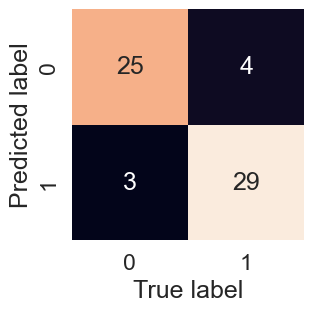

In [90]:
sns.set(font_scale=1.5)
def plt_conf_mat(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False)
    ax.set(xlabel="True label",
           ylabel="Predicted label");
plt_conf_mat(y_test,y_pred)

In [69]:
sns.heatmap??

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Source:   
def heatmap(
    data, *,
    vmin=None, vmax=None, cmap=None, center=None, robust=False,
    annot=None, fmt=".2g", annot_kws=None,
    linewidths=0, linecolor="white",
    cbar=True, cbar_kws=None, cbar_ax=None,
    square=False, xticklabels="auto", yticklabels="auto",
    mask=None, ax=None,
    **kwargs
):
    """Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a

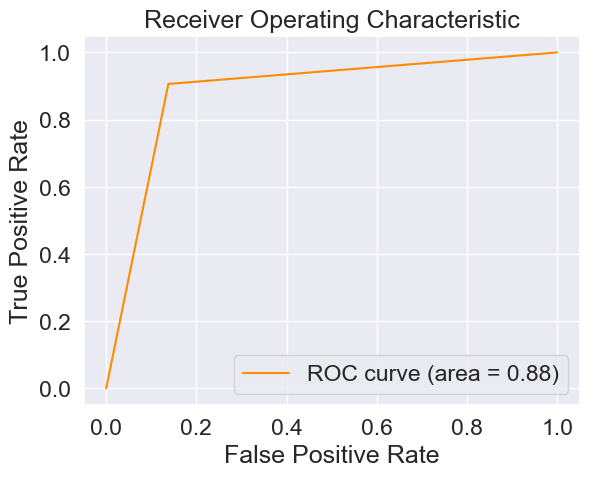

In [92]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**cross_validation**

In [94]:
cv_acc=cross_val_score(model,
                       X,Y,
                       cv=5,
                       scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc


0.8446994535519124

In [96]:
cv_pre=cross_val_score(model,
                       X,Y,
                       cv=5,
                       scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre


0.8207936507936507

In [97]:
cv_recall=cross_val_score(model,
                       X,Y,
                       cv=5,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall


0.9212121212121213

In [98]:
cv_f1=cross_val_score(model,
                       X,Y,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

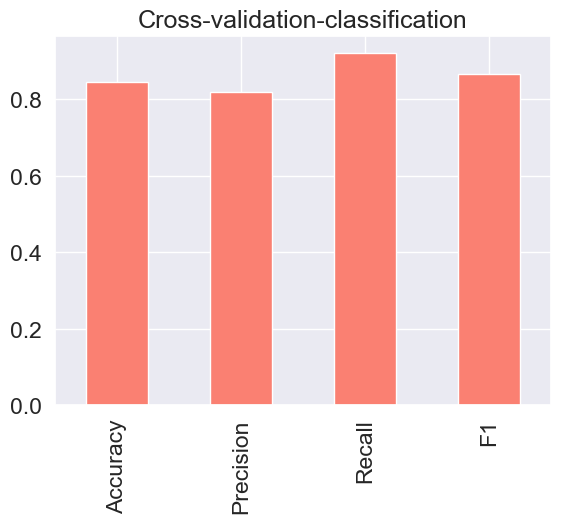

In [100]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-validation-classification",
                      legend=False,
                      color=["salmon"]);

#### Feature Importance

This helps to know what feature contributes most to the outcomes of the model.

Also we can know what is the importance of the feature in finding the target.

In [104]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
model.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [110]:
##Match coef's to columns
feature_dict=dict(zip(df.columns,list(model.coef_[0])))

In [111]:
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

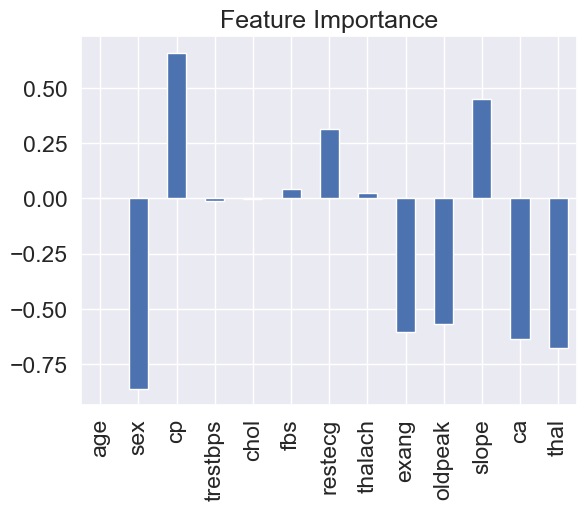

In [113]:
## visualize the feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);